<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.316463,49.791838,20.882733,0.000294,125.991327,125.990972,0.000355
1,0.0,1.0,93.685879,43.698379,52.356192,0.000020,199.740471,199.740385,0.000086
2,0.0,2.0,99.911367,63.212188,72.335363,-0.000509,245.458410,245.458878,-0.000469
3,0.0,3.0,41.201608,84.067383,90.484382,0.000278,225.753652,225.753439,0.000213
4,0.0,4.0,69.684253,39.491849,41.398168,0.000833,160.575102,160.574215,0.000887
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.220741,69.255728,23.965929,-0.000186,178.442213,178.442538,-0.000325
119996,999.0,116.0,65.906399,78.353535,59.050029,-0.000030,213.309933,213.309970,-0.000036
119997,999.0,117.0,25.975283,50.445100,23.830659,-0.000158,110.250883,110.251217,-0.000334
119998,999.0,118.0,64.029714,68.851910,41.981131,0.000099,184.862854,184.862835,0.000019


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.316463  49.791838  20.882733  ...  125.991327  125.990972  0.000355
      1.0    93.685879  43.698379  52.356192  ...  199.740471  199.740385  0.000086
      2.0    99.911367  63.212188  72.335363  ...  245.458410  245.458878 -0.000469
      3.0    41.201608  84.067383  90.484382  ...  225.753652  225.753439  0.000213
      4.0    69.684253  39.491849  41.398168  ...  160.575102  160.574215  0.000887
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.220741  69.255728  23.965929  ...  178.442213  178.442538 -0.000325
      116.0  65.906399  78.353535  59.050029  ...  213.309933  213.309970 -0.000036
      117.0  25.975283  50.445100  23.830659  ...  110.250883  110.251217 -0.000334
      118.0  64.029714  68.851910  41.981131  ...  184.862854  184.862835  0.000019
      119.0  69.910907  73.956451  71.675288  ...  225.542590  225.542616 -0.000026

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.316463  49.791838  20.882733  ...  125.991327  125.990972  0.000355
      1.0    93.685879  43.698379  52.356192  ...  199.740471  199.740385  0.000086
      2.0    99.911367  63.212188  72.335363  ...  245.458410  245.458878 -0.000469
      3.0    41.201608  84.067383  90.484382  ...  225.753652  225.753439  0.000213
      4.0    69.684253  39.491849  41.398168  ...  160.575102  160.574215  0.000887
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.220741  69.255728  23.965929  ...  178.442213  178.442538 -0.000325
      116.0  65.906399  78.353535  59.050029  ...  213.309933  213.309970 -0.000036
      117.0  25.975283  50.445100  23.830659  ...  110.250883  110.251217 -0.000334
      118.0  64.029714  68.851910  41.981131  ...  184.862854  184.862835  0.000019
      119.0  69.910907  73.956451  71.675288  ...  225.542590  225.542616 -0.000026

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.316463,49.791838,20.882733,0.000294,125.991327,125.990972,0.000355
1,0.0,1.0,93.685879,43.698379,52.356192,0.000020,199.740471,199.740385,0.000086
2,0.0,2.0,99.911367,63.212188,72.335363,-0.000509,245.458410,245.458878,-0.000469
3,0.0,3.0,41.201608,84.067383,90.484382,0.000278,225.753652,225.753439,0.000213
4,0.0,4.0,69.684253,39.491849,41.398168,0.000833,160.575102,160.574215,0.000887
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.220741,69.255728,23.965929,-0.000186,178.442213,178.442538,-0.000325
119996,999.0,116.0,65.906399,78.353535,59.050029,-0.000030,213.309933,213.309970,-0.000036
119997,999.0,117.0,25.975283,50.445100,23.830659,-0.000158,110.250883,110.251217,-0.000334
119998,999.0,118.0,64.029714,68.851910,41.981131,0.000099,184.862854,184.862835,0.000019


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.316463  49.791838  20.882733  ...  125.991327  125.990972  0.000355
      1.0    93.685879  43.698379  52.356192  ...  199.740471  199.740385  0.000086
      2.0    99.911367  63.212188  72.335363  ...  245.458410  245.458878 -0.000469
      3.0    41.201608  84.067383  90.484382  ...  225.753652  225.753439  0.000213
      4.0    69.684253  39.491849  41.398168  ...  160.575102  160.574215  0.000887
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.220741  69.255728  23.965929  ...  178.442213  178.442538 -0.000325
      116.0  65.906399  78.353535  59.050029  ...  213.309933  213.309970 -0.000036
      117.0  25.975283  50.445100  23.830659  ...  110.250883  110.251217 -0.000334
      118.0  64.029714  68.851910  41.981131  ...  184.862854  184.862835  0.000019
      119.0  69.910907  73.956451  71.675288  ...  225.542590  225.542616 -0.000026

[120000 rows x 7 columns]

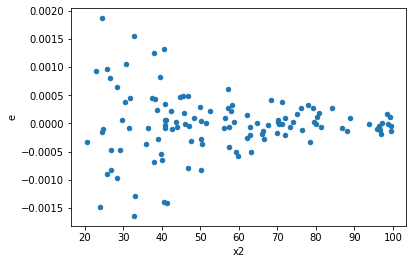

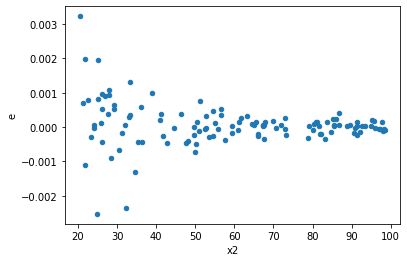

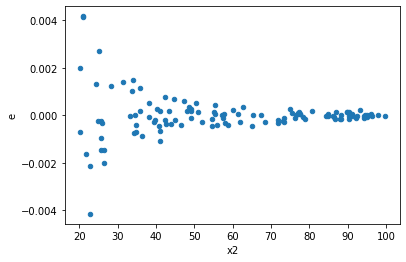

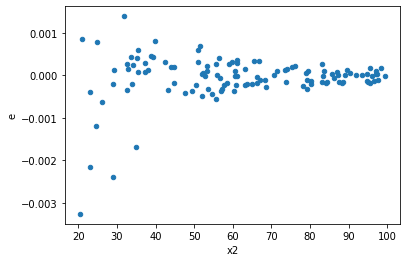

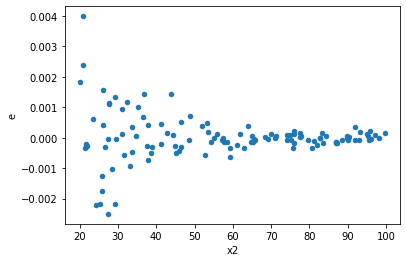

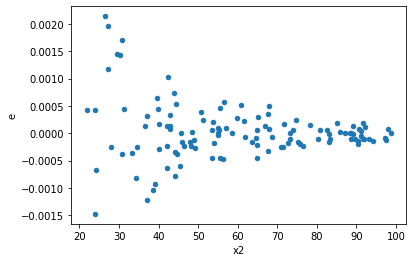

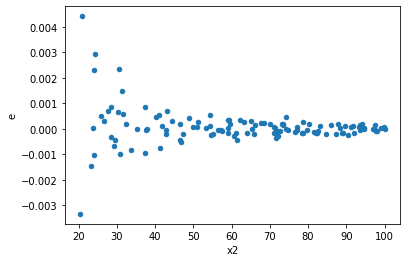

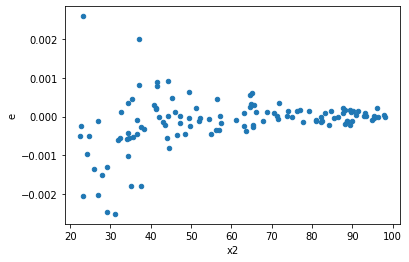

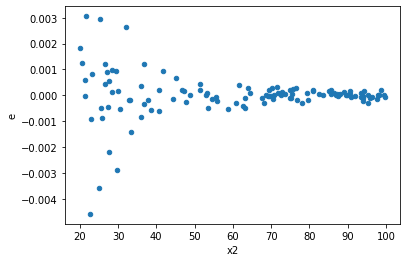

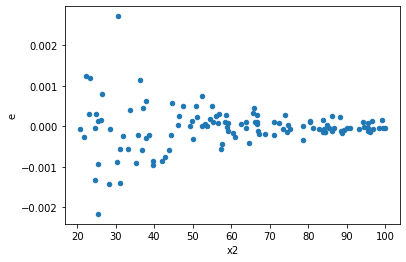

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,64.0,50.0,1.4498662273286873e-05,1.8716754665193423e-05,2.3013749640137894e-07,3.819745850039474e-07,1.65239009778082,0.05826634121096741,0.9708668293945163,Reject001=1 : Homoscedasticity
3.0,62.0,52.0,1.470069985902634e-05,1.874208564851323e-05,2.409950796561695e-07,3.6749187546104373e-07,1.5200863294199638,0.11422056589916973,0.9428897170504151,Reject001=1 : Homoscedasticity
4.0,65.0,49.0,2.430007726399483e-06,7.019015174720373e-05,3.796887072499192e-08,1.4622948280667443e-06,38.316497498853494,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,56.0,58.0,5.0997379652290996e-06,2.4768772592827737e-05,9.27225084587109e-08,4.345398700496094e-07,4.689393288289111,3.2200447641628216e-08,0.9999999838997762,Reject001=0 : Heteroscedasticity
8.0,65.0,49.0,1.9490349567788765e-06,8.885159091269549e-05,3.0453671199669945e-08,1.851074810681156e-06,60.473186939213626,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
10.0,55.0,59.0,1.9928384707362883e-06,6.89683434723389e-05,3.690441612474608e-08,1.1891093702127396e-06,32.261783641779644,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
11.0,54.0,60.0,1.2553611889854363e-06,5.97411324878797e-05,2.3686060169536533e-08,1.0125615675911814e-06,42.8299199551847,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
12.0,64.0,50.0,2.46954674925635e-06,4.190047083132828e-05,3.9199154750100795e-08,8.551116496189445e-07,21.717589545632404,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
15.0,62.0,52.0,1.906257444060513e-05,3.669761585209938e-05,3.12501220337789e-07,7.195610951392035e-07,2.2953274126819263,0.0018575595497567488,0.9990712202251216,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,64.0,50.0,1.4498662273286873e-05,1.8716754665193423e-05,2.3013749640137894e-07,3.819745850039474e-07,1.65239009778082,0.05826634121096741,Reject001=1 : Homoscedasticity
1.0,61.0,53.0,4.195593913192771e-05,1.5020169835695459e-06,6.992656521987952e-07,2.8884941991722035e-08,0.041203618939940526,9.76536080902092e-24,Reject001=0 : Heteroscedasticity
2.0,63.0,51.0,9.054921525578614e-05,1.531710763615019e-06,1.4604712138030022e-06,3.063421527230038e-08,0.02089596570092208,3.2454887520217494e-30,Reject001=0 : Heteroscedasticity
3.0,62.0,52.0,1.470069985902634e-05,1.874208564851323e-05,2.409950796561695e-07,3.6749187546104373e-07,1.5200863294199638,0.11422056589916973,Reject001=1 : Homoscedasticity
4.0,65.0,49.0,2.430007726399483e-06,7.019015174720373e-05,3.796887072499192e-08,1.4622948280667443e-06,38.316497498853494,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,56.0,58.0,5.0997379652290996e-06,2.4768772592827737e-05,9.27225084587109e-08,4.345398700496094e-07,4.689393288289111,3.2200447641628216e-08,Reject001=0 : Heteroscedasticity
6.0,58.0,56.0,3.490983786325373e-05,2.4241348594631653e-05,6.124532958465566e-07,4.407517926296664e-07,0.7191987296757915,0.2175253142983951,Reject001=1 : Homoscedasticity
7.0,54.0,60.0,3.088460638500636e-05,1.6033140079881946e-05,5.827284223586106e-07,2.717481369471516e-07,0.4672174186716862,0.004429151676024635,Reject001=0 : Heteroscedasticity
8.0,65.0,49.0,1.9490349567788765e-06,8.885159091269549e-05,3.0453671199669945e-08,1.851074810681156e-06,60.473186939213626,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    636
Reject001=1 : Homoscedasticity      364
Name: Result_test, dtype: int64